In [ ]:
#On fait une importation des framweworks qu’on travailler avec, notamment : Keras, tensorflow, CV2, matplotlib, etc.
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import numpy as np # linear algebra
import keras.backend as K 
import time as ti 
import cv2
import os
import glob # for including images
import scipy.io as sio
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras import models
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.python.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, AveragePooling2D  
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import * 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import MobileNetV2

In [ ]:
#On importe les données (training et test), on fait l’extraction des deux fichiers zip. 
on utilise les fonctions de cv(opencv) pour faire redimensionner et adapter la coulour et la taille des images puis on construit un array pour les étiquettes et un autre pour les images traitées pour les deux dataset( test et training)

X_train = [] # training fruit images
y_train = [] # training fruit labels 

X_test = [] # test fruit images
y_test = [] # test fruit labels 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/Training" -d "/content"
!unzip -uq "/content/drive/MyDrive/Test" -d "/content"

In [ ]:

# We will need the images in a 32x32x3 input format.


for dir_path in glob.glob("/content/Training/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img1 = cv2.imread(img_path)
        img1 = cv2.resize(img1, (32, 32))
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        X_train.append(img1)
        y_train.append(img_label)
        
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
Ici on transforme les images en données numérique en divisant les pixels sur 256
# Images will also be in a 32x32x3 format.


X_test = [] # test fruit images
y_test = [] # test fruit labels 

for dir_path in glob.glob("/content/Test/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_test.append(img)
        y_test.append(img_label)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print(y_test)

In [ ]:
#Dans cette étape on va transformer les étiquettes en données numériques uniques( chaque étiquette unique va être codé par un nombre) 
# Now we need to have them labeled with numbers from 0 - 120 
label_to_id={v:k for k, v in enumerate(np.unique(y_train))}
#print(label_to_id)

y_train_label_id = np.array([label_to_id[i] for i in y_train])
y_test_label_id = np.array([label_to_id[i] for i in y_test])

# We need to translate this to be "one hot encoded" so our CNN can understand, 
# otherwise it will think this is some sort of regression problem on a continuous axis

from keras.utils.np_utils import to_categorical
print(y_train_label_id.shape)

y_cat_train_label_id=to_categorical(y_train_label_id)
y_cat_test_label_id=to_categorical(y_test_label_id)

In [ ]:
# def build_model():
#     mobilenetv2 = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None, include_top=False,classes=120)

    #Varianta 1
#     model=Sequential(mobilenetv2.layers)
#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dense(120, activation='softmax'))
    
    # Varianta 2
#     model = Sequential([mobilenetv2,Dense(120, activation='softmax')])
    
    
    # Varianta 3
#     model=Sequential()
#     model.add(mobilenetv2)
#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dense(120, activation='softmax'))
    
   
#     return model


In [ ]:
model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=131)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 16, 16, 32)   0           bn_Conv1[0][0]                   
________________________________________________________________________________

In [ ]:
input_shape=(32,32,3)
epochs=30



filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

result = model.fit(X_train,y_cat_train_label_id,
                       batch_size=15,
                       epochs=30,
                       verbose=1,
                       validation_data=(X_test,y_cat_test_label_id),
                       callbacks=callbacks_list
                      )

Epoch 1/30
4513/4513 [==============================] - 70s 13ms/step - loss: 2.6934 - accuracy: 0.3466 - val_loss: 5.5517 - val_accuracy: 0.0079

Epoch 00001: val_accuracy improved from -inf to 0.00793, saving model to weights-improvement-01-0.01.hdf5
Epoch 2/30
4513/4513 [==============================] - 58s 13ms/step - loss: 0.6659 - accuracy: 0.7900 - val_loss: 20.9897 - val_accuracy: 0.1288

Epoch 00002: val_accuracy improved from 0.00793 to 0.12883, saving model to weights-improvement-02-0.13.hdf5
Epoch 3/30
4513/4513 [==============================] - 57s 13ms/step - loss: 0.4094 - accuracy: 0.8683 - val_loss: 19.4543 - val_accuracy: 0.1056

Epoch 00003: val_accuracy did not improve from 0.12883
Epoch 4/30
4513/4513 [==============================] - 56s 12ms/step - loss: 0.2828 - accuracy: 0.9099 - val_loss: 6.1079 - val_accuracy: 0.3981

Epoch 00004: val_accuracy improved from 0.12883 to 0.39805, saving model to weights-improvement-04-0.40.hdf5
Epoch 5/30
4513/4513 [=========

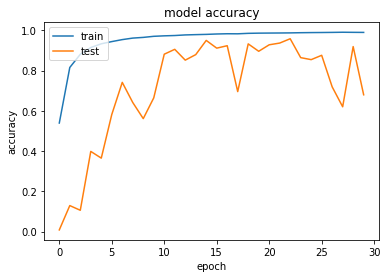

In [ ]:
plt.figure(1)  
plt.plot(result.history['accuracy'])  
plt.plot(result.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

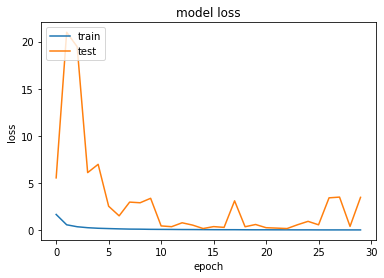

In [ ]:
plt.plot(result.history['loss'])  
plt.plot(result.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [ ]:
# Load weights
model.load_weights("weights-improvement-12-0.95.hdf5")

# Compile model (required to make predictions)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print("Created model and loaded weights from file")
model.evaluate(X_test,y_cat_test_label_id)

OSError: ignored

In [ ]:
#model.save("MobileNetV2 - 131 - 2.0.h5")